## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [115]:
data = pd.read_csv("./titanic.csv")

print("Description :")
print(data.describe())

print("\nРозмірність :")
print(data.shape)

print("\nTypes:")
print(data.dtypes)

print("\nHow many:")
print(data.count())

Description :
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Розмірність :
(891, 12)

Types:
PassengerId      int64
Survived   

Якщо у вас не показується весь output, клікніть view as scrollable element

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [118]:
missing_values = data.isnull().sum()

print("Nans: ")
print(missing_values)


Nans: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_bin          0
dtype: int64


Ваші висновки: у файлі присутні поля з відсутніми данними

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



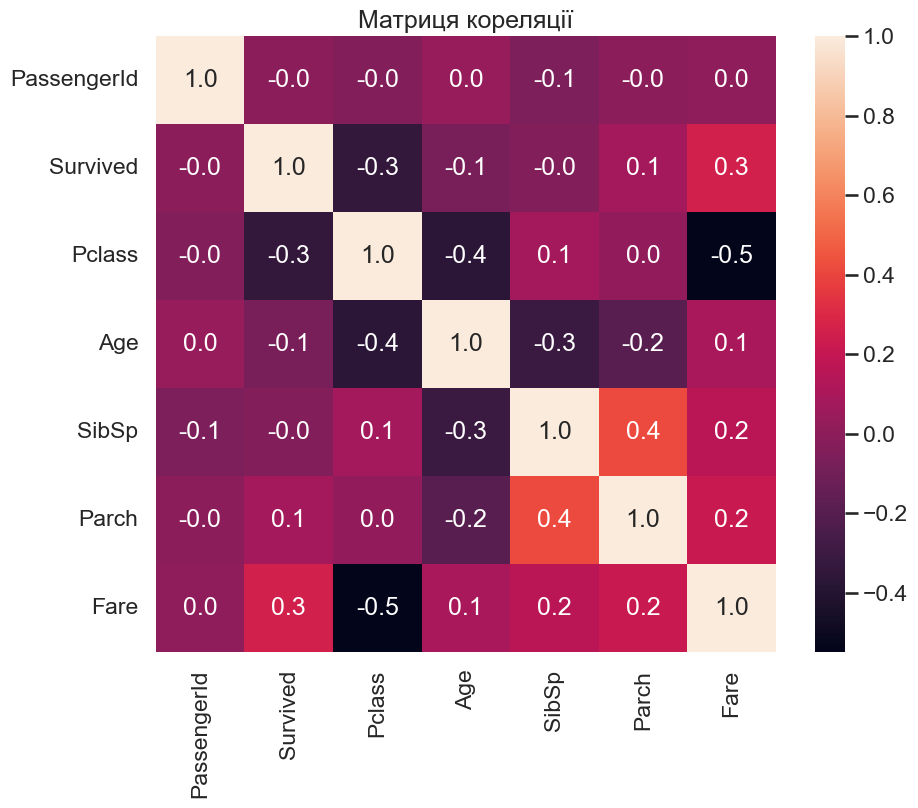

In [31]:
numeric_columns = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Матриця кореляції')
plt.show()


Ваші висновки: Цей код допомагає зрозуміти, наскільки сильно залежать один від одного числові дані у вашому наборі. Якщо кореляція близька до 1, то зміни у одному стовпці майже точно вказують на зміни у іншому. Якщо близька до 0, то зв'язок між стовпцями відсутній.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [117]:
def fill_Nan(data, column, groupby_columns):
    data[column] = data.groupby(groupby_columns)[column].transform('median')
    return data


fill_Nan(data, 'Age', ['Sex'])
# fill_Nan(data, 'Embarked', ['Pclass'])
# fill_Nan(data, 'Cabin', ['Pclass'])

filled_data = data.isnull().sum()
print("NaNs:")
print(filled_data)


NaNs:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_bin          0
dtype: int64


Ваші висновки: Змінні в колонці віку були замінені схожими з колонки статі.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





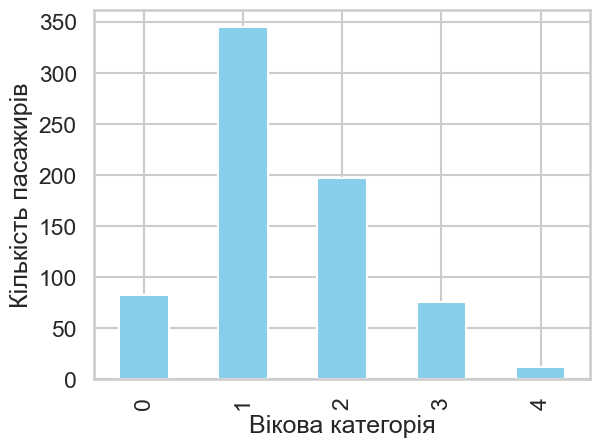

In [125]:
data = pd.read_csv("./titanic.csv")

def get_age_bin(age):
    if age < 16:
        return '0'
    elif age < 32:
        return '1'
    elif age < 48:
        return '2'
    elif age < 64:
        return '3'
    elif age < 80:
        return '4'

data['Age_bin'] = data['Age'].apply(get_age_bin)
age_distribution = data.groupby('Age_bin').size()
age_distribution = age_distribution.reindex(['0', '1', '2', '3', '4'], fill_value=0)
age_distribution.plot(kind='bar', color='skyblue')

plt.xlabel('Вікова категорія')
plt.ylabel('Кількість пасажирів')

plt.show()


Ваші висновки: Найбільше було людей 16-32.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [126]:
data['Fare_bin'] = pd.qcut(data['Fare'], q=4, labels=False)
survived_by_fare_bin = data.groupby('Fare_bin')['Survived'].sum()
print(survived_by_fare_bin)

Fare_bin
0     44
1     68
2    101
3    129
Name: Survived, dtype: int64


Ваші висновки: З цього ми можемо взяти чи вплинула вартість квитка на виживаємість пасажира.Fare bin (3) це люди які купили найдорожчий квиток, їх найбільше отже згідно статистики ціна квитка вплинула на виживаємість.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [137]:
data["Family_size"] = data["Parch"] + data["SibSp"]
data["Alone"] = data["Family_size"] == 0


family_size_survival = data.groupby('Family_size')['Survived'].mean()
print(family_size_survival)
alone_survival = data.groupby('Alone')['Survived'].mean()
print(alone_survival)



Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64
Alone
False    0.505650
True     0.303538
Name: Survived, dtype: float64


Ваші висновки: Тут ми бачимо що людей без сім`ї вижило менше, ніж тих хто мав.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [139]:

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(columns=columns_to_drop, inplace=True)

print(data)


     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Age_bin  \
0           0       3    male  22.0      1      0   7.2500        S       1   
1           1       1  female  38.0      1      0  71.2833        C       2   
2           1       3  female  26.0      0      0   7.9250        S       1   
3           1       1  female  35.0      1      0  53.1000        S       2   
4           0       3    male  35.0      0      0   8.0500        S       2   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S       1   
887         1       1  female  19.0      0      0  30.0000        S       1   
888         0       3  female   NaN      1      2  23.4500        S    None   
889         1       1    male  26.0      0      0  30.0000        C       1   
890         0       3    male  32.0      0      0   7.7500        Q       2   

     Fare_bin  Family_size  Alone  
0           0  

Ваші висновки:
PassengerId: Непотрібний і ні на що не впливає
Name: ім'я пасажира не впливає на ймовірність виживання.
Ticket: номер квитка не має відношення до виживання.
Cabin: Містить багато пропущених значень

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [146]:
# TITLE ?

sex_mapping = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(sex_mapping)

embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

print("\nTypes:")
print(data.dtypes)


Types:
Survived         int64
Pclass           int64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
Age_bin         object
Fare_bin         int64
Family_size      int64
Alone             bool
dtype: object


Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



In [ ]:
#code

Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

In [ ]:
#code

Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [ ]:
#code

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.